___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.7


In [2]:
#pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 5.8 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 5.1 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.9 M

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [7]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


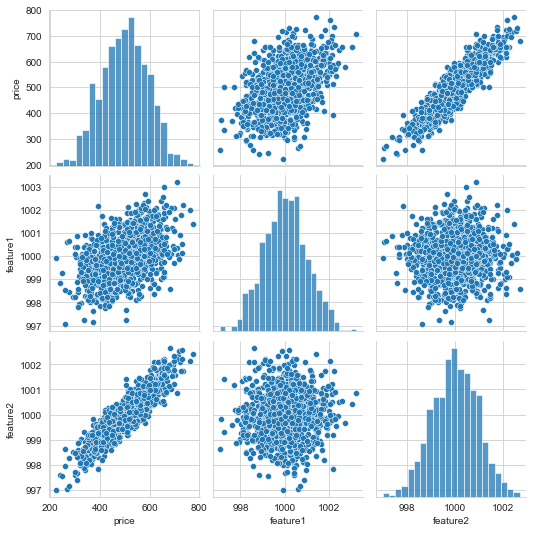

In [10]:
sns.pairplot(df);

In [11]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [14]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [15]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [16]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
X_train.shape

(700, 2)

In [19]:
X_test.shape

(300, 2)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [24]:
import tensorflow as tf

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [26]:
# help(Sequential)

In [27]:
# help(Dense)

In [84]:
X_train.shape

(700, 2)

In [85]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [86]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 12        
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.weights

[<tf.Variable 'dense_24/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.38951635, -0.6430781 ,  0.16283345,  0.3959489 ],
        [-0.21238136,  0.803457  ,  0.39760947,  0.24976945]],
       dtype=float32)>,
 <tf.Variable 'dense_24/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_25/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.3036844 ,  0.86149424, -0.2949338 ,  0.6144455 ],
        [ 0.11267608, -0.15498936, -0.1946308 ,  0.08865321],
        [ 0.7266715 , -0.7055031 ,  0.19810551, -0.33759493],
        [-0.23710012, -0.40327367,  0.15893406, -0.66945475]],
       dtype=float32)>,
 <tf.Variable 'dense_25/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_26/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.12913847,  0.7850488 ,  0.48058206, -0.44480973],
        [ 0.02818221, -0.56854165, -0.14410573,  0.00263464],
        [-0.32480723, -0.3255726 ,  0

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [88]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [89]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 256778.8594
Epoch 2/250
22/22 [==============================] - 0s 5ms/step - loss: 256692.2500
Epoch 3/250
22/22 [==============================] - 0s 4ms/step - loss: 256659.5625
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256631.1250
Epoch 5/250
22/22 [==============================] - 0s 5ms/step - loss: 256601.9375
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 256570.4688
Epoch 7/250
22/22 [==============================] - 0s 6ms/step - loss: 256536.9219
Epoch 8/250
22/22 [==============================] - 0s 6ms/step - loss: 256501.1875
Epoch 9/250
22/22 [==============================] - 0s 8ms/step - loss: 256462.8750
Epoch 10/250
22/22 [==============================] - 0s 6ms/step - loss: 256421.2969
Epoch 11/250
22/22 [==============================] - 0s 7ms/step - loss: 256376.2344
Epoch 12/250
22/22 [==============================] - 0s 6ms/st

In [90]:
model.weights

[<tf.Variable 'dense_24/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.2500811 ,  1.4030373 ,  2.5477483 ,  2.905477  ],
        [-0.29604155,  4.815063  ,  4.794553  ,  4.7938247 ]],
       dtype=float32)>,
 <tf.Variable 'dense_24/bias:0' shape=(4,) dtype=float32, numpy=array([-0.16710934,  1.0078768 ,  1.4574149 ,  1.5852711 ], dtype=float32)>,
 <tf.Variable 'dense_25/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.26835853,  0.86997163, -0.18498088,  0.6144455 ],
        [-0.07543866, -0.15498936,  3.001948  ,  0.08865321],
        [ 0.5338893 , -0.700813  ,  3.1871326 , -0.33759493],
        [-0.43380705, -0.39284673,  3.097621  , -0.66945475]],
       dtype=float32)>,
 <tf.Variable 'dense_25/bias:0' shape=(4,) dtype=float32, numpy=array([-0.19160315,  0.00972584,  1.4862263 ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_26/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.11611014,  0.7492327 ,  0.395363  , -0.25432876],
        [ 0.02501993, -0.57

In [91]:
model.history.history

{'loss': [256778.859375,
  256692.25,
  256659.5625,
  256631.125,
  256601.9375,
  256570.46875,
  256536.921875,
  256501.1875,
  256462.875,
  256421.296875,
  256376.234375,
  256327.015625,
  256273.125,
  256213.53125,
  256148.1875,
  256076.65625,
  255998.1875,
  255912.578125,
  255819.46875,
  255717.78125,
  255607.75,
  255488.3125,
  255358.625,
  255217.296875,
  255063.5625,
  254896.15625,
  254714.671875,
  254516.609375,
  254302.90625,
  254070.671875,
  253819.5,
  253547.40625,
  253254.859375,
  252941.09375,
  252602.234375,
  252238.171875,
  251848.40625,
  251431.6875,
  250987.703125,
  250510.609375,
  250004.046875,
  249463.6875,
  248890.375,
  248279.59375,
  247632.09375,
  246948.0625,
  246221.71875,
  245455.59375,
  244646.703125,
  243793.515625,
  242896.75,
  241941.4375,
  240938.71875,
  239894.65625,
  238800.234375,
  237643.46875,
  236433.921875,
  235162.53125,
  233835.953125,
  232448.65625,
  231007.984375,
  229491.59375,
  227909.828

In [92]:
pd.DataFrame(model.history.history)

,loss
0,256778.859
1,256692.250
2,256659.562
3,256631.125
4,256601.938
...,...
245,99.296
246,94.529
247,89.752
248,85.656


<AxesSubplot:>

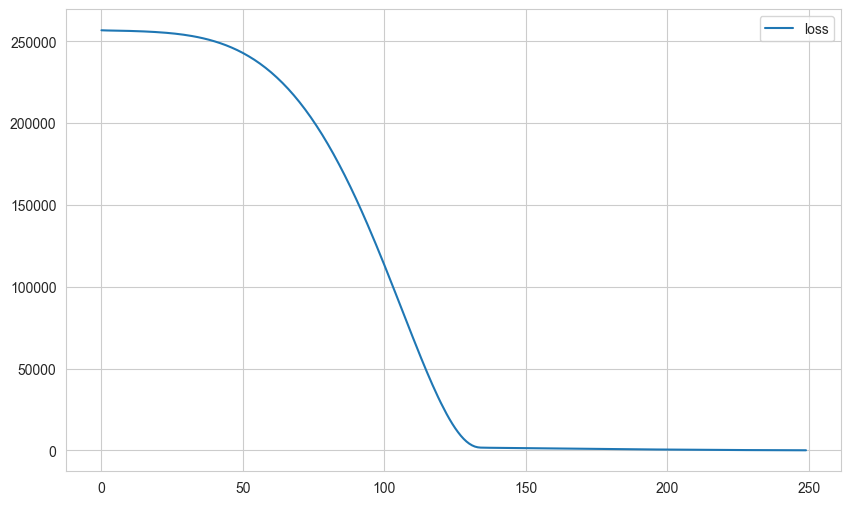

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

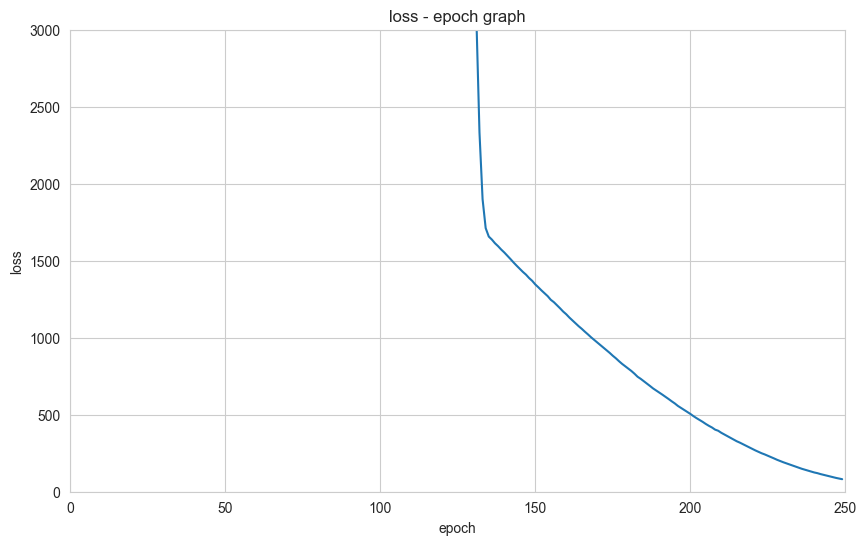

In [94]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [96]:
model.evaluate(X_train, y_train, verbose=0)

78.67766571044922

In [97]:
model.evaluate(X_test, y_test, verbose=0)

77.41620635986328

In [98]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 4ms/step


(300, 1)

In [99]:
y_test.shape

(300,)

In [100]:
y_pred.reshape(-1,).shape

(300,)

In [101]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
548,475.176,476.426
677,547.713,544.102
697,498.190,500.252
797,618.123,613.920
323,367.792,384.137
660,578.589,569.088
9,633.350,628.869
486,549.848,547.694
436,610.297,602.047
789,545.585,540.868


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

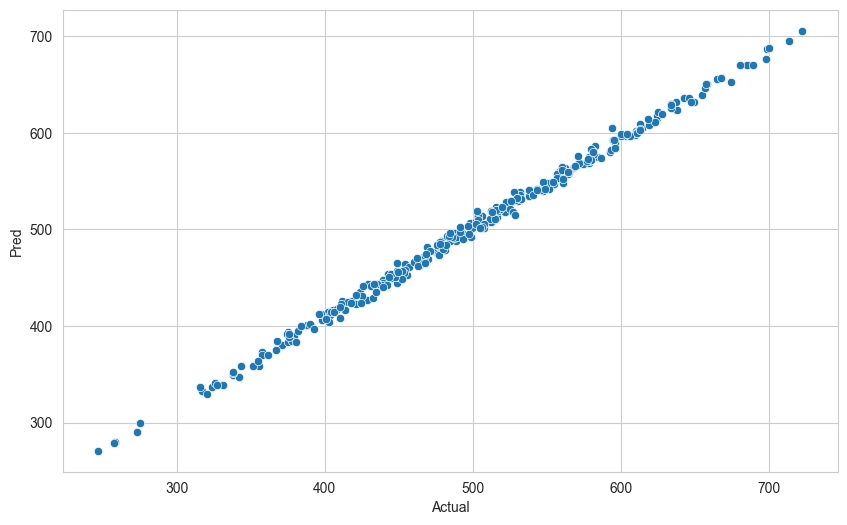

In [102]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [103]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [104]:
eval_metric(y_test, y_pred)

r2_score: 0.9911947289674105 
mae: 7.195276867995972 
mse: 77.41622174106814 
rmse: 8.798648858834415


## Final Model and Model Deployment

### Final Model Training

In [105]:
scaler = MinMaxScaler().fit(X)

In [106]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [107]:
X_scaled = scaler.transform(X)

In [108]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 2s 5ms/step - loss: 257132.3750
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 256851.0156
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 256526.1406
Epoch 4/250
32/32 [==============================] - 0s 5ms/step - loss: 256135.6094
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 255655.0312
Epoch 6/250
32/32 [==============================] - 0s 8ms/step - loss: 255081.4219
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 254395.2031
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 253579.5625
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 252625.0625
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 251518.0781
Epoch 11/250
32/32 [==============================] - 0s 6ms/step - loss: 250243.3750
Epoch 12/250
32/32 [==============================] - 0s 6ms/st

In [109]:
final_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 4)                 12        
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [110]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [111]:
#final_model.save("model_fake_reg") 

### Loading Model

In [112]:
from tensorflow.keras.models import load_model

In [113]:
model_fake_reg = load_model('model_fake_reg.h5')

In [114]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [115]:
sample = [[998, 1000]]

In [116]:
sample_scaled = scaler_fake_reg.transform(sample)

In [117]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 179ms/step


array([[417.13943]], dtype=float32)

## Prediction-2

In [118]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [119]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [120]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [121]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 69ms/step


array([[377.24948],
       [329.10016],
       [280.95084],
       [232.80151],
       [184.65218]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___